In [288]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

import statsmodels.api as sma

from sklearn.preprocessing import *
from sklearn.model_selection import *

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBClassifier

from sklearn.metrics import *

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [139]:
df = pd.read_csv("data_set.csv")
df.head()

,Student I.D.,Age,Gender,ISiF,Viva_Score,Written_Score,Nqi,Ndiq,LsDp,Education_Level,N_de,P_in,S_Fit,Interview_center,N_at,S_10,S_12,Selection
0,2370,NaN,Male,3,9.666853,253.355183,1,1,106.8635992,Masters,1,Poor,13,East,1,29.406406,34.96,Rejected
1,2371,51.0,Female,1,22.591295,258.081171,2,1,101.9870576,Double Masters,2,Poor,11,East,1,40.146583,44.48,Rejected
2,2372,58.0,Male,3,14.889823,249.338592,3,1,124.8536995,Double Masters,3,Very Good,10,West,1,43.984982,25.77,Rejected
3,2373,54.0,Male,2,9.948302,235.107669,2,1,106.856292,M.Phil,1,Average,11,North,4,51.321849,46.49,Rejected
4,2374,52.0,Male,0,10.162708,NaN,2,1,119.5353453,Graduate,1,Poor,9,East,3,24.409154,42.20,Rejected


An IS aspirant wants to see what could be the possible factors that helps a candidate to become IS.He has collected various information about the students from the past records.He has collected the selection data about the candidates as well.The aspirant wants to see if there is a pattern to classify the candidates who has been `Rejected` or `Accepted`
Given below is the detail of the dataset.

**Detail of the dataset**

`Student I.D.` --> Index of applicant enrolment number

`Age`  --> Age of the applicant

`Gender` --> Gender of the applicant

`ISiF` --> Number of IS in the family of the applicant

`Viva_Score` --> Score achieved by the applicant in the viva exam

`Written_Score` --> Score achieved by the applicant in the written exam 

`Nqi` --> Number of questions asked to the applicant in interview

`Ndiq` --> Number of difficult questions asked to the applicant in interview

`LsDp` --> scaled Score of the applicant in last degree program

`Education_Level` --> Last achieved education level of the applicant

`N_de` --> Number of dependents on the applicant

`P_in` --> Performance of the applicant in the interview     

`S_Fit` --> Score achieved by the applicant in the physical fitness assessment 

`Interview_center `  --> Interview center zone alloted for the applicant

`N_at` --> Number of attempt of the applicant

`S_10` --> Score of the applicant in  the 10 th board exam

`S_12` -->  Score of the applicant in  the 12 th board exam

`Selection` --> whether the applicant has rejected or selcted

### 1.	Data Understanding (8 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (2 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)

d.	Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (4 marks)


First, we need to load all of our libraries we will use for this project.

##### a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

In [140]:
df.shape

(6011, 18)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student I.D.      6011 non-null   int64  
 1   Age               5412 non-null   float64
 2   Gender            6011 non-null   object 
 3   ISiF              6011 non-null   int64  
 4   Viva_Score        6011 non-null   float64
 5   Written_Score     5387 non-null   float64
 6   Nqi               6011 non-null   int64  
 7   Ndiq              6011 non-null   int64  
 8   LsDp              6011 non-null   object 
 9   Education_Level   6011 non-null   object 
 10  N_de              6011 non-null   int64  
 11  P_in              6011 non-null   object 
 12  S_Fit             6011 non-null   int64  
 13  Interview_center  6011 non-null   object 
 14  N_at              6011 non-null   int64  
 15  S_10              6011 non-null   float64
 16  S_12              5650 non-null   float64


In [142]:
print("No of rows: ", df.shape[0])
print("No of variables: ", df.shape[1])

No of rows:  6011
No of variables:  18


In [143]:
num_col = df.select_dtypes(include=np.number)
num_col

,Student I.D.,Age,ISiF,Viva_Score,Written_Score,Nqi,Ndiq,N_de,S_Fit,N_at,S_10,S_12
0,2370,NaN,3,9.666853,253.355183,1,1,1,13,1,29.406406,34.96
1,2371,51.0,1,22.591295,258.081171,2,1,2,11,1,40.146583,44.48
2,2372,58.0,3,14.889823,249.338592,3,1,3,10,1,43.984982,25.77
3,2373,54.0,2,9.948302,235.107669,2,1,1,11,4,51.321849,46.49
4,2374,52.0,0,10.162708,NaN,2,1,1,9,3,24.409154,42.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6006,2365,54.0,1,17.520195,235.844935,1,1,1,9,2,47.442668,15.95
6007,2366,50.0,3,10.510617,254.349422,1,0,2,7,4,45.709586,52.69
6008,2367,56.0,1,9.240526,NaN,3,1,2,6,4,27.104480,23.37
6009,2368,54.0,1,18.416980,239.790076,1,1,1,10,4,29.933738,28.23


In [144]:
print("No of numerical variables : ",num_col.shape[1])

No of numerical variables :  12


In [145]:
cat_col = df.select_dtypes(include=object)
cat_col

,Gender,LsDp,Education_Level,P_in,Interview_center,Selection
0,Male,106.8635992,Masters,Poor,East,Rejected
1,Female,101.9870576,Double Masters,Poor,East,Rejected
2,Male,124.8536995,Double Masters,Very Good,West,Rejected
3,Male,106.856292,M.Phil,Average,North,Rejected
4,Male,119.5353453,Graduate,Poor,East,Rejected
...,...,...,...,...,...,...
6006,Male,109.1426445,M.Phil,Very Good,West,Rejected
6007,Male,113.7737061,M.Phil,Poor,North,Rejected
6008,Female,110.5970387,Under graduate,Poor,East,Rejected
6009,Male,116.6791871,Doctorate,Very Good,South,Rejected


In [146]:
print("No of categorical variables :",cat_col.shape[1])

No of categorical variables : 6


##### b.	Calculate five-point summary for numerical variables (1 MARK)

In [147]:
df.describe(include=np.number)

,Student I.D.,Age,ISiF,Viva_Score,Written_Score,Nqi,Ndiq,N_de,S_Fit,N_at,S_10,S_12
count,6011.000000,5412.000000,6011.000000,6011.000000,5387.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,5650.000000
mean,3985.027949,65.509054,1.647812,14.069158,248.555385,2.659790,0.911163,1.554317,9.528531,2.515222,40.867625,40.395181
std,1754.272987,15.157124,1.061928,5.130764,10.356986,1.098272,0.708701,0.669395,2.281002,1.115565,11.198465,11.630763
min,6.000000,29.000000,0.000000,1.241648,212.122186,1.000000,0.000000,1.000000,6.000000,1.000000,1.242888,3.010000
25%,2492.500000,53.000000,1.000000,9.403510,240.667384,2.000000,0.000000,1.000000,8.000000,2.000000,33.245788,32.280000
50%,3995.000000,69.000000,1.000000,14.611830,249.338592,3.000000,1.000000,1.000000,10.000000,3.000000,40.952178,39.870000
75%,5497.500000,78.000000,3.000000,18.334351,255.374700,4.000000,1.000000,2.000000,12.000000,4.000000,48.623251,48.720000
max,7000.000000,91.000000,3.000000,27.644734,283.852277,4.000000,2.000000,3.000000,13.000000,4.000000,84.045723,86.030000


#### c.	Summarize observations for categorical variables – no. of categories, % observations in each category

In [148]:
for i in cat_col:
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print("="*100)

Gender
Male      69.70554
Female    30.29446
Name: Gender, dtype: float64
LsDp
?              1.264349
112.3576993    0.016636
113.3823462    0.016636
117.9127594    0.016636
98.76468273    0.016636
                 ...   
103.8016579    0.016636
111.0754026    0.016636
104.7373354    0.016636
107.9843665    0.016636
120.0157216    0.016636
Name: LsDp, Length: 5936, dtype: float64
Education_Level
Graduate           24.355349
Under graduate     14.606555
Doctorate          14.456829
Masters            14.440193
Double Masters     14.074197
M.Phil             14.057561
Double graduate     4.009316
Name: Education_Level, dtype: float64
P_in
Very Good    51.988022
Average      36.399933
Poor         11.612045
Name: P_in, dtype: float64
Interview_center
East     49.492597
North    30.593911
West     10.497421
South     9.416071
Name: Interview_center, dtype: float64
Selection
Rejected    84.67809
Accepted    15.32191
Name: Selection, dtype: float64


##### d.	Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (4 marks)

In [149]:
df.isnull().sum()

Student I.D.          0
Age                 599
Gender                0
ISiF                  0
Viva_Score            0
Written_Score       624
Nqi                   0
Ndiq                  0
LsDp                  0
Education_Level       0
N_de                  0
P_in                  0
S_Fit                 0
Interview_center      0
N_at                  0
S_10                  0
S_12                361
Selection             0
dtype: int64

In [150]:
df.skew()

Student I.D.    -0.044103
Age             -0.391446
ISiF            -0.018020
Viva_Score      -0.035589
Written_Score   -0.123087
Nqi             -0.331132
Ndiq             0.128450
N_de             0.806747
S_Fit           -0.018509
N_at            -0.017708
S_10            -0.068453
S_12             0.074763
dtype: float64

#### 2.	Data Preparation (17 marks)

a.	Fix the defects found above and do appropriate treatment if any. (10 marks)

b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (3 marks)

c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

 d.	Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (2 marks)

##### a.	Fix the defects found above and do appropriate treatment if any. (10 marks)

In [151]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [152]:
df["Age"].isnull().sum()

0

In [153]:
df["Written_Score"] = df["Written_Score"].fillna(df["Written_Score"].median())

In [154]:
df["Written_Score"].isnull().sum()

0

In [155]:
df["S_12"] = df["S_12"].fillna(df["S_12"].median())

In [156]:
df["S_12"].isnull().sum() 

0

In [157]:
df.LsDp.replace(to_replace="?",value=np.nan,inplace=True)

In [158]:
df.LsDp.isnull().sum()

76

In [159]:
df["LsDp"] = df["LsDp"].fillna(df["LsDp"].median())

In [160]:
df.LsDp.isnull().sum()

0

In [161]:
df["LsDp"]=df["LsDp"].astype(float)

In [162]:
cat_col = df.select_dtypes(include = object)
cat_col

,Gender,Education_Level,P_in,Interview_center,Selection
0,Male,Masters,Poor,East,Rejected
1,Female,Double Masters,Poor,East,Rejected
2,Male,Double Masters,Very Good,West,Rejected
3,Male,M.Phil,Average,North,Rejected
4,Male,Graduate,Poor,East,Rejected
...,...,...,...,...,...
6006,Male,M.Phil,Very Good,West,Rejected
6007,Male,M.Phil,Poor,North,Rejected
6008,Female,Under graduate,Poor,East,Rejected
6009,Male,Doctorate,Very Good,South,Rejected


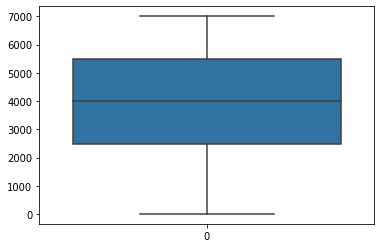

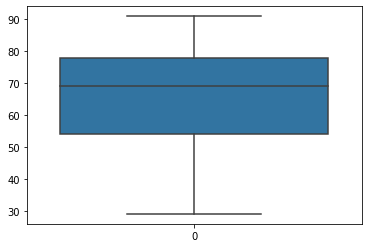

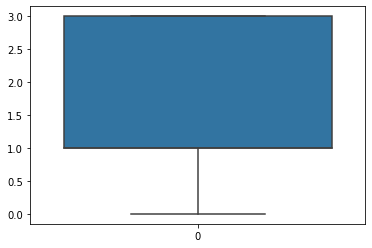

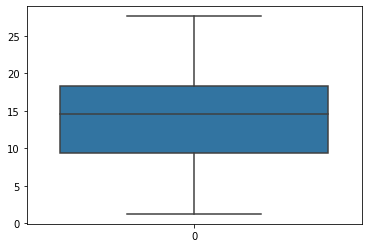

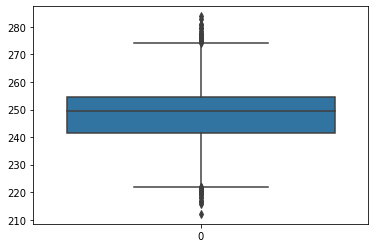

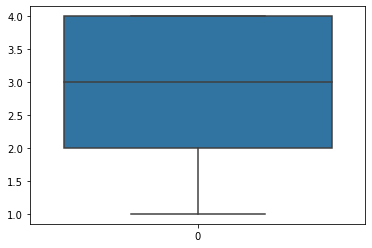

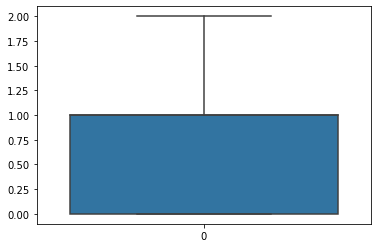

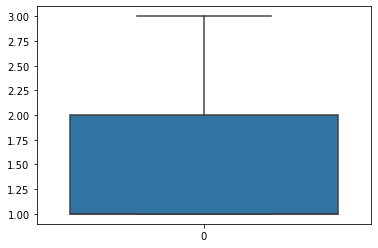

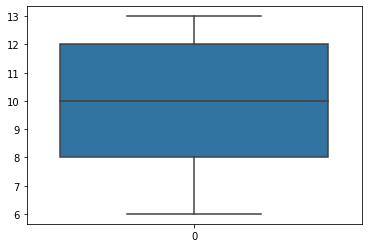

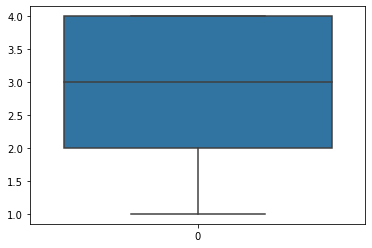

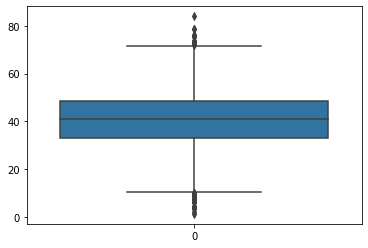

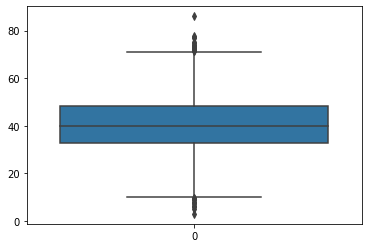

In [163]:
for i in num_col.columns:
    sns.boxplot(df[i])
    plt.show()

* There is not much outliers in the numerical variables. 
* since the data set has limited data , i have considered to not treat the outliers

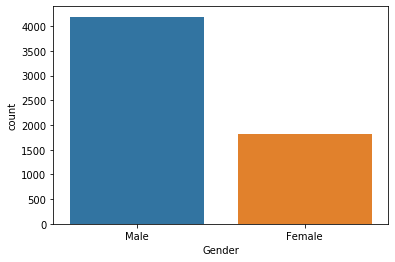

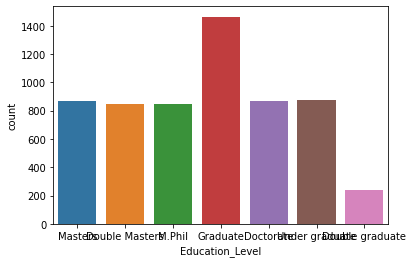

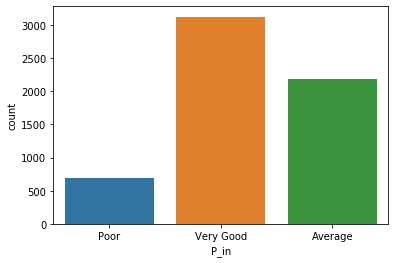

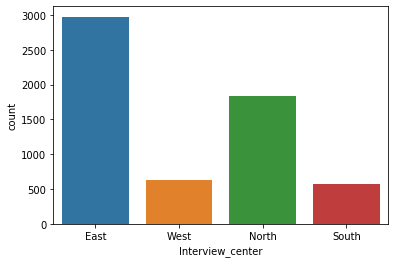

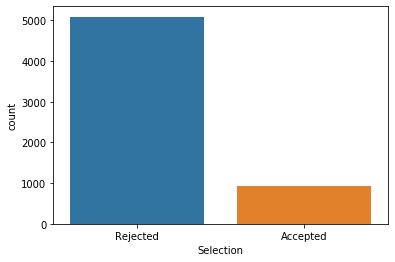

In [164]:
for i in cat_col.columns:
    sns.countplot(x=df[i])
    plt.show()

* since the above visualized are the categorical variables where we cant able to predict the outliers so here we can only able to check the balanced or imbalanced data

* since the target variable has some imbalanced data in it

In [165]:
df.Selection.value_counts(normalize=True)*100

Rejected    84.67809
Accepted    15.32191
Name: Selection, dtype: float64

* the data is imbalanced
* here for this dataset im considered it as balanced and i am continuing with this

##### b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (3 marks)

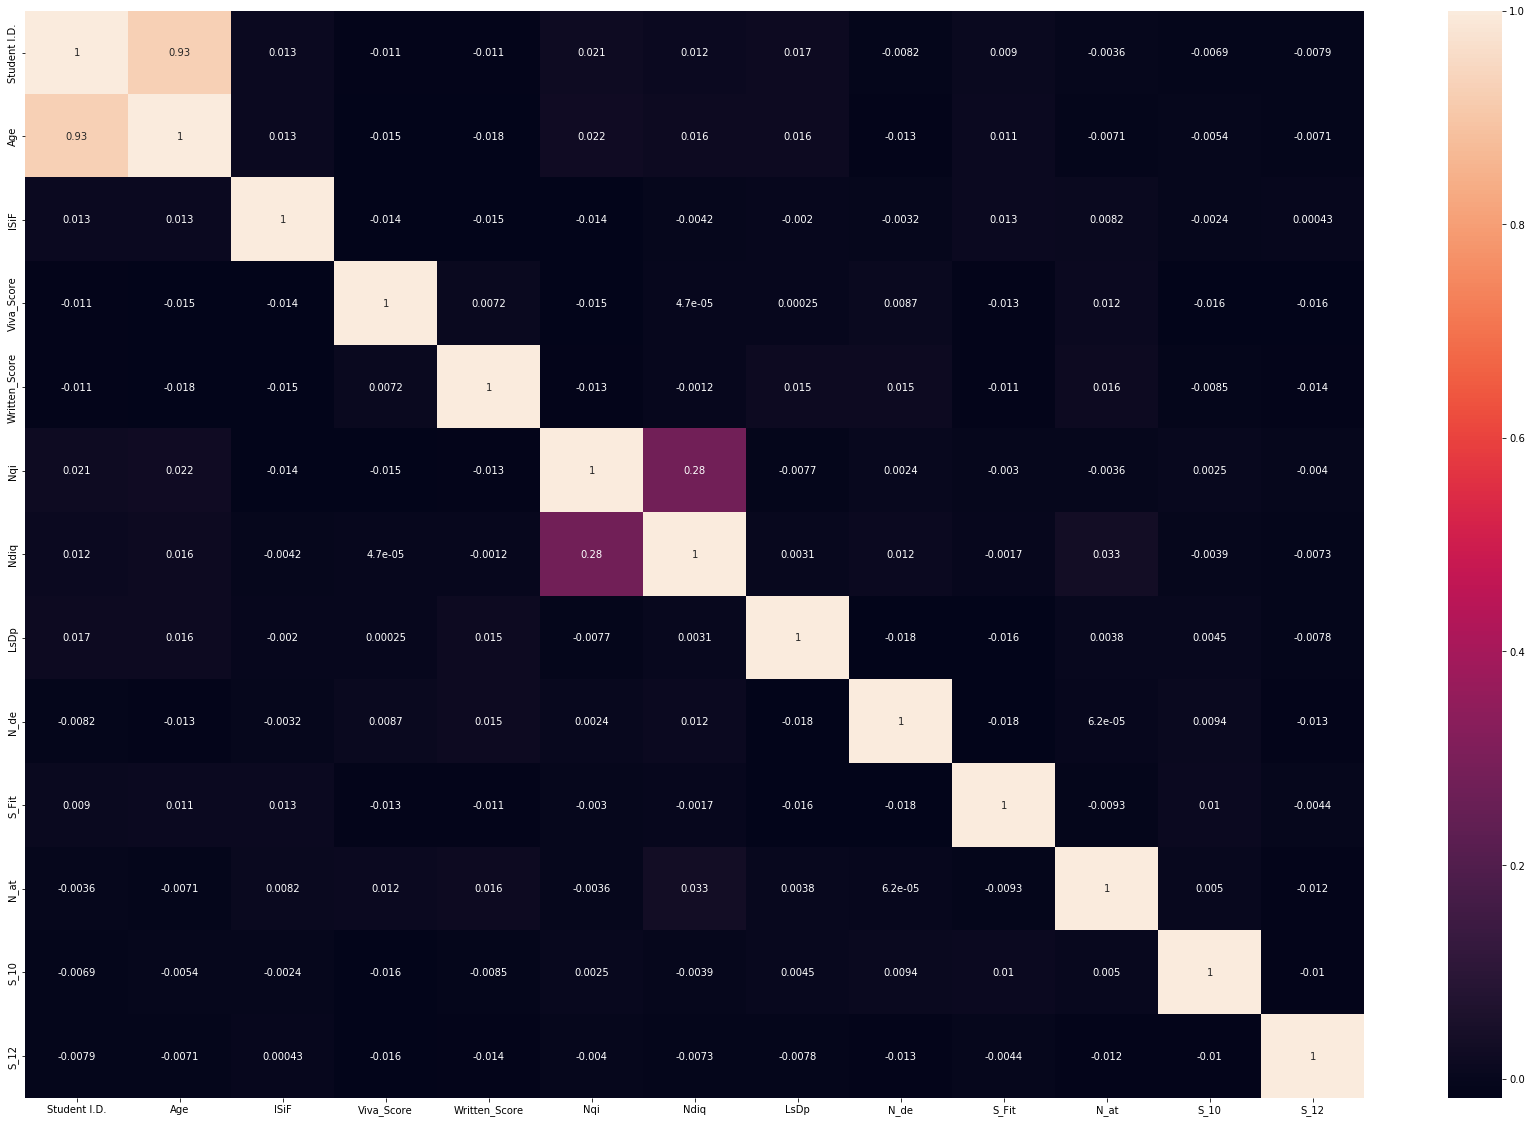

In [166]:
plt.figure(figsize=[30,20])
sns.heatmap(df.corr(),annot=True)

* the dataset has less correlation between the independent variables

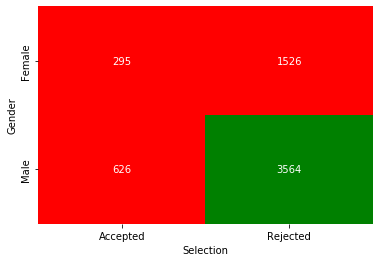

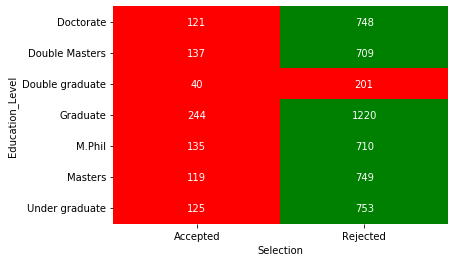

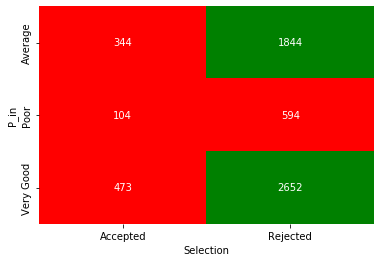

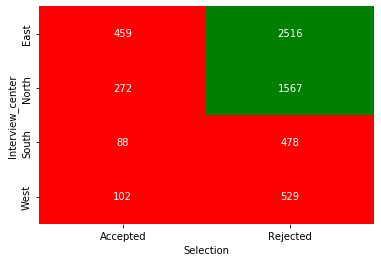

In [167]:
for i in cat_col.columns[:-1]:
    sns.heatmap(pd.crosstab(df[i],df["Selection"]),annot=True,fmt="d",cbar=False,cmap=["red","green"])
    plt.show()

* according to the selection on the basis of gender the males got rejected compared to female.
* according to the selection on the basis of education the graduated students with graduation got rejected most compared to others
* according to the selection on the basis of performance in the interview the very good and average peformed students got rejected most(their count is high) 
* according to the selection on the basis of interview center alloted north and east center students faced most of the rejection compared to south and west

##### c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

* as per my knowledge student id doesn't add any values to the dataset or the problem statement

In [168]:
df = df.drop(['Student I.D.'],axis=1)

##### d.	Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (2 marks)

In [169]:
df.head()

,Age,Gender,ISiF,Viva_Score,Written_Score,Nqi,Ndiq,LsDp,Education_Level,N_de,P_in,S_Fit,Interview_center,N_at,S_10,S_12,Selection
0,69.0,Male,3,9.666853,253.355183,1,1,106.863599,Masters,1,Poor,13,East,1,29.406406,34.96,Rejected
1,51.0,Female,1,22.591295,258.081171,2,1,101.987058,Double Masters,2,Poor,11,East,1,40.146583,44.48,Rejected
2,58.0,Male,3,14.889823,249.338592,3,1,124.853700,Double Masters,3,Very Good,10,West,1,43.984982,25.77,Rejected
3,54.0,Male,2,9.948302,235.107669,2,1,106.856292,M.Phil,1,Average,11,North,4,51.321849,46.49,Rejected
4,52.0,Male,0,10.162708,249.338592,2,1,119.535345,Graduate,1,Poor,9,East,3,24.409154,42.20,Rejected


In [170]:
for i in cat_col.columns:
    print(f"{i}---- ",df[i].unique())

Gender----  ['Male' 'Female']
Education_Level----  ['Masters' 'Double Masters' 'M.Phil' 'Graduate' 'Doctorate'
 'Under graduate' 'Double graduate']
P_in----  ['Poor' 'Very Good' 'Average']
Interview_center----  ['East' 'West' 'North' 'South']
Selection----  ['Rejected' 'Accepted']


In [171]:
#df["Gender"] = df["Gender"].replace(to_replace=['Male','Female'],value = [0,1])
#df["Education_Level"] = df["Education_Level"].replace(to_replace=['Masters','Double Masters','M.Phil','Graduate','Doctorate','Under graduate','Double graduate'],value = [0,1,2,3,4,5,6],inplace=True)
#df["P_in"] = df["P_in"].replace(to_replace=['Poor','Very Good','Average'],value=[0,1,2],inplace=True)
#df["Interview_center"]=df["Interview_center"].replace(to_replace= ['East','West','North','South'],value=[0,1,2,3],inplace=True)
#df["Selection"] = df["Selection"].replace(to_replace=['Rejected','Accepted'],value=[0,1],inplace=True)

In [172]:
df["Gender"] = pd.get_dummies(df["Gender"],drop_first=True)

In [173]:
df["Education_Level"] = pd.get_dummies(df["Education_Level"],drop_first=True)

In [174]:
df["P_in"]=pd.get_dummies(df["P_in"],drop_first=True)

In [175]:
df["Interview_center"]=pd.get_dummies(df["Interview_center"],drop_first=True)

In [176]:
df["Selection"]=pd.get_dummies(df["Selection"],drop_first=True)

In [177]:
df.shape

(6011, 17)

In [178]:
df

,Age,Gender,ISiF,Viva_Score,Written_Score,Nqi,Ndiq,LsDp,Education_Level,N_de,P_in,S_Fit,Interview_center,N_at,S_10,S_12,Selection
0,69.0,1,3,9.666853,253.355183,1,1,106.863599,0,1,1,13,0,1,29.406406,34.96,1
1,51.0,0,1,22.591295,258.081171,2,1,101.987058,1,2,1,11,0,1,40.146583,44.48,1
2,58.0,1,3,14.889823,249.338592,3,1,124.853700,1,3,0,10,0,1,43.984982,25.77,1
3,54.0,1,2,9.948302,235.107669,2,1,106.856292,0,1,0,11,1,4,51.321849,46.49,1
4,52.0,1,0,10.162708,249.338592,2,1,119.535345,0,1,1,9,0,3,24.409154,42.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,54.0,1,1,17.520195,235.844935,1,1,109.142645,0,1,0,9,0,2,47.442668,15.95,1
6007,50.0,1,3,10.510617,254.349422,1,0,113.773706,0,2,1,7,1,4,45.709586,52.69,1
6008,56.0,0,1,9.240526,249.338592,3,1,110.597039,0,2,1,6,0,4,27.104480,23.37,1
6009,54.0,1,1,18.416980,239.790076,1,1,116.679187,0,1,0,10,0,4,29.933738,28.23,1


In [179]:
df.select_dtypes(include=np.number)

,Age,Gender,ISiF,Viva_Score,Written_Score,Nqi,Ndiq,LsDp,Education_Level,N_de,P_in,S_Fit,Interview_center,N_at,S_10,S_12,Selection
0,69.0,1,3,9.666853,253.355183,1,1,106.863599,0,1,1,13,0,1,29.406406,34.96,1
1,51.0,0,1,22.591295,258.081171,2,1,101.987058,1,2,1,11,0,1,40.146583,44.48,1
2,58.0,1,3,14.889823,249.338592,3,1,124.853700,1,3,0,10,0,1,43.984982,25.77,1
3,54.0,1,2,9.948302,235.107669,2,1,106.856292,0,1,0,11,1,4,51.321849,46.49,1
4,52.0,1,0,10.162708,249.338592,2,1,119.535345,0,1,1,9,0,3,24.409154,42.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,54.0,1,1,17.520195,235.844935,1,1,109.142645,0,1,0,9,0,2,47.442668,15.95,1
6007,50.0,1,3,10.510617,254.349422,1,0,113.773706,0,2,1,7,1,4,45.709586,52.69,1
6008,56.0,0,1,9.240526,249.338592,3,1,110.597039,0,2,1,6,0,4,27.104480,23.37,1
6009,54.0,1,1,18.416980,239.790076,1,1,116.679187,0,1,0,10,0,4,29.933738,28.23,1


**HYPOTHESIS TEST**

* h0 : both train and test representative of the overall data
* h1 : both train and test not representative of the overall data

In [206]:
x = df.drop("Selection",axis=1)
y = df["Selection"]

In [207]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [208]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(4207, 16) (1804, 16) (4207,) (1804,)


In [209]:
print(stats.ttest_ind(xtrain,xtest))
print()
print("="*100)
print()
print(stats.ttest_ind(ytrain,ytest))

Ttest_indResult(statistic=array([-0.94869716, -0.58246283,  0.83885041,  0.20582307,  1.17413958,
        1.36491734,  0.26754176, -2.01750298, -0.65554557, -0.79928361,
        0.56927023,  1.65932626,  1.58273385, -1.45170663,  0.3035553 ,
        1.08676806]), pvalue=array([0.34281281, 0.56027682, 0.40158663, 0.83693609, 0.24038565,
       0.17233013, 0.78906125, 0.04368742, 0.51214165, 0.42415757,
       0.56919405, 0.09710225, 0.11353477, 0.1466354 , 0.76147722,
       0.27718292]))


Ttest_indResult(statistic=-0.18805188114661822, pvalue=0.8508423311222074)


* from both the test all the variables has pvalue greater than the significance level 
* so we accept the null hypothesis
* both train and test representative of the overall data

#### 3.	Model Building (25 marks)

a.	Fit a base model and explain the reason of selecting that model. Please write your key observations. (6 marks)

b.	What is the overall Accuracy? Please comment on whether it is good or not.  (4 mark)

c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (4 marks) 

d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (7 marks)

e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)


In [228]:
x = df.drop("Selection",axis=1)
y = df["Selection"]

In [229]:
ss = StandardScaler()

scaled_df = ss.fit_transform(x)

In [230]:
scaled_df = pd.DataFrame(scaled_df,columns=df.columns[:-1])

In [241]:
df_final = pd.concat((scaled_df,y),axis=1)

In [243]:
x  = df_final.drop("Selection",axis=1)
y = df_final["Selection"]

In [244]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [249]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(4207, 16) (1804, 16) (4207,) (1804,)


##### a.	Fit a base model and explain the reason of selecting that model. Please write your key observations. (6 marks)

* Here i have chosen the statiscal logit model as my base model, so that i can get more inference from it

In [245]:
xtrain_con = sma.add_constant(xtrain)
xtest_con = sma.add_constant(xtest)

In [246]:
base_model = sma.Logit(ytrain,xtrain_con).fit()

Optimization terminated successfully.
         Current function value: 0.140927
         Iterations 6


In [247]:
base_model.summary()

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:593: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:593: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Selection   No. Observations:                 4207
Model:                          Logit   Df Residuals:                     4190
Method:                           MLE   Df Model:                           16
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                     inf
Time:                        05:11:19   Log-Likelihood:                -592.88
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7212      0.043     39.711      0.000       1.636       1.806
Age                 -0.0520      0.043     -1.197      0.231      -0.137       0.033
Gender               0.0810      0.042      1.932      0.053      -0.001       0.163
ISiF                -0.0167      0.043     -0.389      0.697      -0.101       0.068
Viva_Score          -0.0051      0.043     -0.119      0.906      -0.089       0.079
Written_Score       -0.0637      0.043     -1.468      0.142      -0.149       0.021
Nqi                 -0.0779      0.045     -1.722      0.085      -0.167       0.011
Ndiq                 0.0506      0.044      1.147      0.251      -0.036       0.137
LsDp                 0.0433      0.043      0.996      0.319      -0.042       0.128
Education_Level      0.0073      0.043      0.169      0.866      -0.078       0.092
N_de                 0.0387      0.043      0.891      0.373      -0.046       0.124
P_in                 0.0580      0.045      1.289      0.198      -0.030       0.146
S_Fit                0.0062      0.043      0.145      0.885      -0.078       0.090
Interview_center     0.0117      0.043      0.273      0.785      -0.072       0.096
N_at                 0.0790      0.043      1.835      0.067      -0.005       0.163
S_10                -0.0639      0.043     -1.483      0.138      -0.148       0.021
S_12                 0.0352      0.043      0.820      0.412      -0.049       0.119
====================================================================================
"""

* from this statistical model i can infer that it gives less weightage on the target variable
* p value shows the insignificant and significant variables

##### b.	What is the overall Accuracy? Please comment on whether it is good or not.  (4 mark)

In [278]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)


In [279]:
model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

logreg = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["LogisticRegression"] = logreg
model_report.T

,accuracy,recall,precision,f1score
LogisticRegression,0.848115,1.0,0.848115,0.917816


In [272]:
fpr,tpr,threshold = roc_curve(ytest,ypred)

In [274]:
roc_auc_score(ytest,ypred)

0.5

* the accuracy of the model is good it predicts 84%

##### c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (4 marks) 

* precision where we have to check on the false positive depending on the problem statement by reducing the false positive we can improve the precision score 
* recall where we have to check on the false negative depending on the problem statement by reducing the false negative we can improve the recall score
* f1 score is the harmonic mean of precision and recall. it has to be focused when the data is imbalanced and if the problem statement is focused on both precision and recall.

In [280]:
model_report.T

,accuracy,recall,precision,f1score
LogisticRegression,0.848115,1.0,0.848115,0.917816


* in the base model i have got precision 0.84 so we have to focus on the false positive to reduce it 
* our problem statment is to check the rejection
* rejected is predicated as accepted that is the major problem here so we have to reduce the false positive to improve the preciison


##### d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (7 marks)

In [281]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)


model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

dtree = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["DecisionTreeClassification"] = dtree
model_report.T

,accuracy,recall,precision,f1score
DecisionTreeClassification,0.705654,0.797386,0.846634,0.821272


In [290]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)


model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

rfc = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["RandomForestClassifier"] = rfc
model_report.T

,accuracy,recall,precision,f1score
RandomForestClassifier,0.848115,1.0,0.848115,0.917816


In [282]:
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)


model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

abc = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["AdaBoostClassifier"] = abc
model_report.T

,accuracy,recall,precision,f1score
AdaBoostClassifier,0.846452,0.997386,0.848249,0.916792


In [284]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)


model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

gbc = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["GradientBoostingClassifier"] = gbc
model_report.T

,accuracy,recall,precision,f1score
GradientBoostingClassifier,0.847007,0.998039,0.848333,0.917117


In [289]:
Xgbc = XGBClassifier()
Xgbc.fit(xtrain,ytrain)
ypred = Xgbc.predict(xtest)


model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

Xgbc = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["XGBClassifier"] = Xgbc
model_report.T

,accuracy,recall,precision,f1score
XGBClassifier,0.848115,1.0,0.848115,0.917816


* from all the model gradient boosting classifier works better it increased precision to 0.85833 
* so it would reduced the false positive 
* so from all the model gradient boosting works better

hypertuning done on the gradient boosting

In [293]:
gbc = GradientBoostingClassifier()
param = {"learning_rate" : [0.4,0.5,0.1]}

gbc_cv = GridSearchCV(gbc,param_grid = param)
gbc_cv.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.4, 0.5, 0.1]})

In [294]:
gbc_cv.best_params_

{'learning_rate': 0.1}

In [298]:
gbc = GradientBoostingClassifier(learning_rate= 0.1)
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)



In [299]:

model_report = pd.DataFrame(index = ["accuracy","recall","precision","f1score"])

gbc_c = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]
model_report["GradientBoostingClassifier_hyp"] = gbc_c
model_report.T

,accuracy,recall,precision,f1score
GradientBoostingClassifier_hyp,0.846452,0.997386,0.848249,0.916792


* it gives the best fit model compared to all the models built above.

##### e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)

In [300]:
gbc.feature_importances_

array([0.08937851, 0.00585367, 0.00423853, 0.16133835, 0.17409599,
       0.02851606, 0.00914807, 0.14064984, 0.00732722, 0.00653616,
       0.00248888, 0.01849796, 0.00772822, 0.01583205, 0.14034487,
       0.18802561])

In [304]:
fi = pd.DataFrame()
fi["imp"] = gbc.feature_importances_
fi["cols"] = df_final.columns[:-1]

In [309]:
fi.set_index("cols",inplace=True)

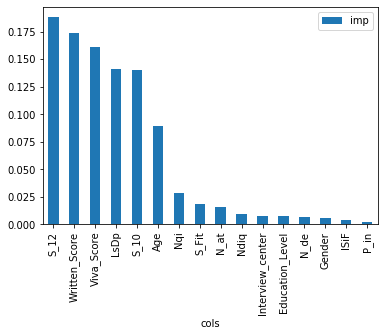

In [311]:
fi.sort_values("imp",ascending=False).plot(kind="bar")

* here s_12> written_score> viva_score>lsdp >s_10 >age> nqi.......
* there are the variables affecting the target variable according to the business interpolation has been visualized
* from s_12 the significant variables are shown